<a href="https://colab.research.google.com/github/lydiandiba/DS-Core-IP-week-6/blob/master/Data_Science_Core_IP_week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question


**a) Specifying the Question**

Mchezopesa Ltd company has recruited me as a football analyst and requested me to predict the results of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly.



**b) Defining the Metric for Success**

For the success of my model, I will compare the tournament types in each game played and the field of play to get to measure the factors that contribute to a team winning a game


**c) Understanding the context**

The FIFA world cup is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War. The current champion is France, which won its second title at the 2018 tournament in Russia.

In the tournament phase, 32 teams, including the automatically qualifying host nation(s), compete for the title at venues within the host nation(s) over about a month.


17 countries have hosted the World Cup. Brazil, France, Italy, Germany, and Mexico have each hosted twice, while Uruguay, Switzerland, Sweden, Chile, England, Argentina, Spain, the United States, Japan and South Korea (jointly), South Africa, and Russia have each hosted once. Qatar will host the 2022 tournament, and 2026 will be jointly hosted by Canada, the United States, and Mexico, which will give Mexico the distinction of being the first country to host games in three World Cups.

**d) Recording the Experimental Design**

I will begin by understanding the datasets i have, then clean the datasets and join them on the common column. From this new merged dataset, I will do my analysis on it, perform necessary feature engineering then come up with a model that will help me answer my problem statement which is predicting the results of a game between two teams.


**e) Data Relevance**

In [0]:
#Import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression

In [0]:
# Improving visual appearance of graphs
sns.set(rc={'figure.figsize':(20, 16)})

# Ensure all columns are displayed
pd.pandas.set_option('display.max_columns', None)

# 2. Reading the Data

In [3]:
# Reading in the datasets using the Pandas
# 
fifa = pd.read_csv("fifa_ranking.csv", parse_dates=['rank_date'])
fifa

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [0]:
# Renaming the rank_date column
#
fifa.rank_date = fifa.rename({'rank_date': 'date'}, axis = 1, inplace = True)

In [5]:
# function to extract the year and month from the date column
# we want to get another column that has the years and months from the date columns so that we use them in our analysis

def extract_year(fifa, column):
    fifa["year"] = fifa[column].apply(lambda x: x.year)
    fifa["month"] = fifa[column].apply(lambda x: x.month)
extract_year(fifa, 'date')
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8


In [6]:
# checking for null values
fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
date                       0
year                       0
month                      0
dtype: int64

In [7]:
# checking for duplicates
fifa.duplicated().sum()

37

In [0]:
#dropping the duplicates
fifa1 = fifa.drop_duplicates(keep = 'first')

In [9]:
# confirming if the duplicates have been dropped
fifa1.duplicated().any()

False

In [10]:
# loading and reading the results dataset

results = pd.read_csv("results.csv", parse_dates=['date'])
results.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [11]:
# function to extract the year and month from the date column

def extract_year(results1, column):
    results["year"] = results1[column].apply(lambda x: x.year)
    results["month"] = results[column].apply(lambda x: x.month)

extract_year(results, 'date')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


In [12]:
# checking for missing values
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
year          0
month         0
dtype: int64

In [13]:
# checking for duplicates
results.duplicated().any()

False

In [14]:
# getting information on the fifa dataset
fifa1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57756 entries, 0 to 57792
Data columns (total 18 columns):
rank                       57756 non-null int64
country_full               57756 non-null object
country_abrv               57756 non-null object
total_points               57756 non-null float64
previous_points            57756 non-null int64
rank_change                57756 non-null int64
cur_year_avg               57756 non-null float64
cur_year_avg_weighted      57756 non-null float64
last_year_avg              57756 non-null float64
last_year_avg_weighted     57756 non-null float64
two_year_ago_avg           57756 non-null float64
two_year_ago_weighted      57756 non-null float64
three_year_ago_avg         57756 non-null float64
three_year_ago_weighted    57756 non-null float64
confederation              57756 non-null object
date                       57756 non-null datetime64[ns]
year                       57756 non-null int64
month                      57756 non-null int

In [15]:
# information on the results dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 11 columns):
date          40839 non-null datetime64[ns]
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
year          40839 non-null int64
month         40839 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(4), object(5)
memory usage: 3.2+ MB


In [16]:
#Merging the results dataset to the fifa dataset

# The datasets will be merged on the home team, year and month
#

df_home = pd.merge(results, fifa,  left_on = ['home_team', 'year', 'month'], right_on = ['country_full', 'year', 'month'],  how = 'inner' )
df_home.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [17]:
df_home.shape

(18609, 27)

In [18]:
# Merging the fifa dataset to the result dataset on the away_team, year and month columns

df_away = pd.merge(results, fifa, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'country_full'])
df_away.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,67,Paraguay,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,67,Paraguay,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
2,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
4,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [19]:
df_away.shape

(18526, 27)

In [20]:
away_ranks = df_away[['away_team','rank','year','month']]
away_ranks.head()


,away_team,rank,year,month
0,Paraguay,67,1993,8
1,Paraguay,67,1993,8
2,Argentina,5,1993,8
3,Argentina,5,1993,8
4,Argentina,5,1993,8


In [21]:
# getting our final meged dataframe to help in our analysis

fifa_df = pd.merge(df_home, away_ranks, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'away_team'])

fifa_df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_x,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y,rank_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
4,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,5


In [22]:
fifa_df.shape

(28518, 28)

In [23]:
fifa_df.isnull().sum()

date_x                     0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
year                       0
month                      0
rank_x                     0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
date_y                     0
rank_y                     0
dtype: int64

In [24]:
# checking for duplicates

fifa_df.duplicated().sum()

11614

In [0]:
# Dropping duplicate rows from the dataset

fifa_df.drop_duplicates(keep = 'first', inplace = True)

# 3. Feature Engineering

In [0]:
#creating a new column called results that is computed by the home score - the away score

fifa_df['result'] = fifa_df['home_score'] - fifa_df['away_score']

In [0]:
#creating a function for the win ,loss and draw

def result(x):
  if x >0:
    return 'win'
  elif x<0:
    return 'loss'
  else:
    return 'draw'

fifa_df['outcome']=fifa_df.result.apply(lambda x: result(x))  

In [0]:
# Dropping the unnecessary columns
#

mycols =  ['date_x','date_y','city', 'country','country_abrv','total_points','previous_points','rank_change','cur_year_avg','cur_year_avg_weighted','last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted','confederation']
fifa_df.drop(mycols, axis = 1, inplace = True)

In [29]:
# previewing our dataset
fifa_df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,month,rank_x,country_full,rank_y,result,outcome
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,Colombia,67,0,draw
2,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,5,Argentina,67,0,draw
4,Colombia,Argentina,2,1,FIFA World Cup qualification,False,1993,8,19,Colombia,5,1,win
7,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,8,70,Peru,5,-1,loss
10,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,1993,8,67,Paraguay,5,-2,loss


In [30]:
# accesing the dataset information using pandas profiling

import pandas_profiling as pp
pp.ProfileReport(fifa_df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,14
Number of observations,16904
Total Missing (%),0.0%
Total size in memory,1.7 MiB
Average record size in memory,105.0 B
Numeric,7
Categorical,5
Boolean,1
Date,0
Text (Unique),0
Rejected,1


# Univariate Analysis

From my pandas profiling, we can see that there are more wins than losses and draws.
More games were played in a field that was not neutral hence less bias.
Also, majority of the games were friendly tournaments.

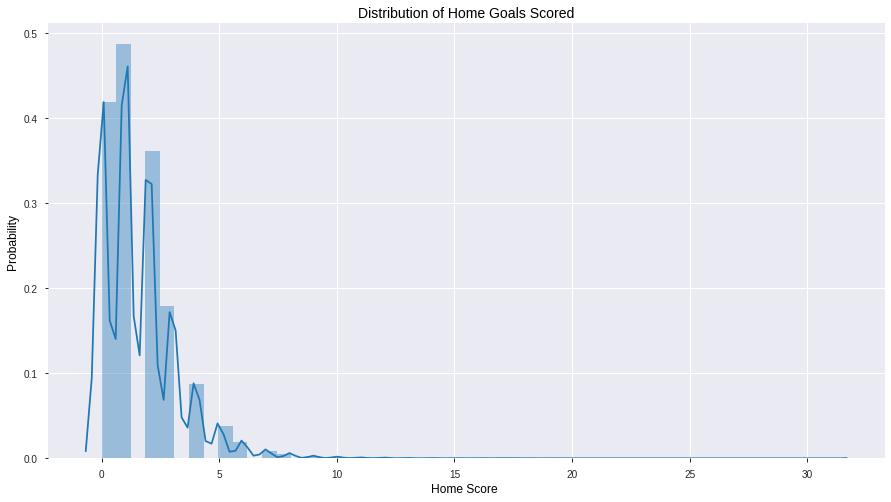

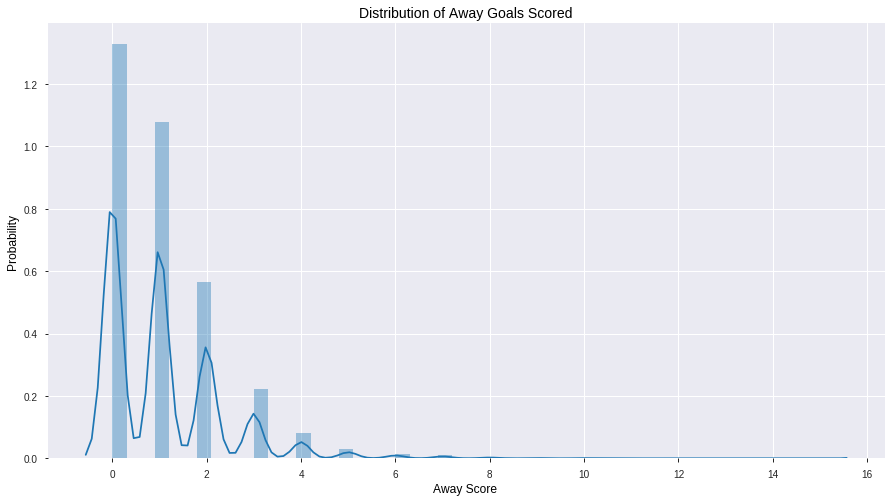

In [31]:
# Graphical univariate analysis
#Using the seaborn library to plot a histogram 
#
%matplotlib inline
plt.subplots(figsize =  (15,8))
sns.distplot(fifa_df.home_score,hist = True, norm_hist = True, bins = None)


plt.xlabel('Home Score ', color = 'black', fontsize =12)
plt.ylabel('Probability', color ='black', fontsize = 12)
plt.title('Distribution of Home Goals Scored', color = 'black', fontsize = 14)
plt.show()
print('\n')


plt.subplots(figsize =  (15,8))
sns.distplot(fifa_df.away_score,hist = True,  bins = None)


plt.xlabel('Away Score ', color = 'black', fontsize =12)
plt.ylabel('Probability', color ='black', fontsize = 12)
plt.title('Distribution of Away Goals Scored', color = 'black', fontsize = 14)
plt.show()

from the visuals on away scores and home scores, we can see that our data is skewed to the right.

# Logistic Regression



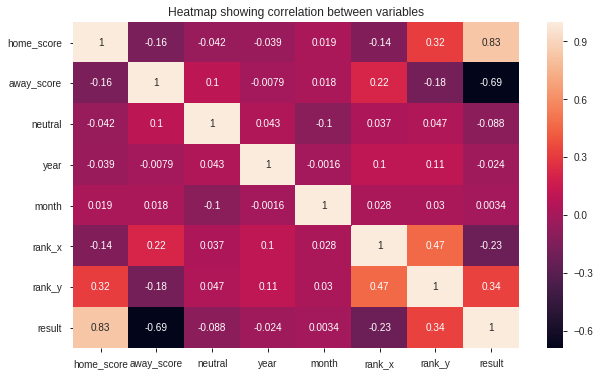

In [32]:
#Checking for correlations between features
#
plt.figure(figsize = (10, 6))
sns.heatmap(fifa_df.corr(), annot = True) 
plt.title('Heatmap showing correlation between variables')
plt.show()

In [33]:
# checking for multicollinearity

corr = fifa_df.corr()
corr

,home_score,away_score,neutral,year,month,rank_x,rank_y,result
home_score,1.000000,-0.163449,-0.041618,-0.038735,0.018577,-0.135751,0.318369,0.828721
away_score,-0.163449,1.000000,0.100754,-0.007922,0.018034,0.221458,-0.180101,-0.687589
neutral,-0.041618,0.100754,1.000000,0.043224,-0.104829,0.037188,0.047499,-0.087788
year,-0.038735,-0.007922,0.043224,1.000000,-0.001626,0.104435,0.105708,-0.024015
month,0.018577,0.018034,-0.104829,-0.001626,1.000000,0.028463,0.029525,0.003442
rank_x,-0.135751,0.221458,0.037188,0.104435,0.028463,1.000000,0.469454,-0.225543
rank_y,0.318369,-0.180101,0.047499,0.105708,0.029525,0.469454,1.000000,0.336489
result,0.828721,-0.687589,-0.087788,-0.024015,0.003442,-0.225543,0.336489,1.000000


there is no correlation within the columns

In [0]:
# Creating a new column to give the type of tournament

def tourn_type(i):
  if i == 'FIFA World Cup':
    return 'FIFA World Cup'
  if i == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'

fifa_df['tournament_type'] = fifa_df.tournament.apply(lambda x: tourn_type(x))

In [35]:
# filter categorical columns using mask and turn it into a list

from sklearn.preprocessing import LabelEncoder
categorical = ['neutral', 'tournament_type', 'outcome']

le = LabelEncoder()

# apply label encoder on categorical feature columns

fifa_df[categorical] = fifa_df[categorical].apply(lambda x: le.fit_transform(x))
fifa_df[categorical].head(10)

,neutral,tournament_type,outcome
0,0,2,0
2,0,2,0
4,0,2,2
7,0,2,1
10,0,2,1
13,0,2,2
16,0,2,2
19,0,2,2
22,0,2,1
24,0,2,0


In [36]:
# Finding the correlation between variables
#
fifa_corr = fifa_df.corr()
fifa_corr

,home_score,away_score,neutral,year,month,rank_x,rank_y,result,outcome,tournament_type
home_score,1.000000,-0.163449,-0.041618,-0.038735,0.018577,-0.135751,0.318369,0.828721,0.519045,0.057697
away_score,-0.163449,1.000000,0.100754,-0.007922,0.018034,0.221458,-0.180101,-0.687589,-0.241272,0.023292
neutral,-0.041618,0.100754,1.000000,0.043224,-0.104829,0.037188,0.047499,-0.087788,-0.045104,0.035227
year,-0.038735,-0.007922,0.043224,1.000000,-0.001626,0.104435,0.105708,-0.024015,-0.018410,-0.033767
month,0.018577,0.018034,-0.104829,-0.001626,1.000000,0.028463,0.029525,0.003442,0.011726,0.131349
rank_x,-0.135751,0.221458,0.037188,0.104435,0.028463,1.000000,0.469454,-0.225543,-0.116157,0.134645
rank_y,0.318369,-0.180101,0.047499,0.105708,0.029525,0.469454,1.000000,0.336489,0.213202,0.134349
result,0.828721,-0.687589,-0.087788,-0.024015,0.003442,-0.225543,0.336489,1.000000,0.518887,0.029251
outcome,0.519045,-0.241272,-0.045104,-0.018410,0.011726,-0.116157,0.213202,0.518887,1.000000,0.046087
tournament_type,0.057697,0.023292,0.035227,-0.033767,0.131349,0.134645,0.134349,0.029251,0.046087,1.000000


In [0]:
# Splitting our dataset
#
X = fifa_df.drop(columns=['result', 'outcome', 'home_score', 'away_score'])
y = fifa_df.outcome

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=30)

In [38]:
fifa_df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,month,rank_x,country_full,rank_y,result,outcome,tournament_type
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,0,1993,8,19,Colombia,67,0,0,2
2,Argentina,Paraguay,0,0,FIFA World Cup qualification,0,1993,8,5,Argentina,67,0,0,2
4,Colombia,Argentina,2,1,FIFA World Cup qualification,0,1993,8,19,Colombia,5,1,2,2
7,Peru,Argentina,0,1,FIFA World Cup qualification,0,1993,8,70,Peru,5,-1,1,2
10,Paraguay,Argentina,1,3,FIFA World Cup qualification,0,1993,8,67,Paraguay,5,-2,1,2


In [0]:
# Fitting our model
# Creating the train and test sets of our dataset

# S = fifa_df.drop(['outcome', 'home_score', 'away_score','result'], axis = 1)
S = fifa_df.drop(['home_team','away_team', 'home_score', 'tournament','neutral','year','month','rank_x','country_full','rank_y','tournament_type'], axis = 1)
t = fifa_df.outcome

S_train, S_test, t_train, t_test = train_test_split(S, t, random_state = 3, test_size = 0.3)

In [40]:
#  Applying and training the model

logreg = LogisticRegression()
logreg.fit(S_train, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predicting the results

t_pred = logreg.predict(S_test)


In [42]:
# Evaluating the performance of the model
#
from sklearn.metrics import confusion_matrix
print('The accuracy of the model is',  accuracy_score(t_test, t_pred))
confusion_matrix(t_test, t_pred)

The accuracy of the model is 1.0


array([[1191,    0,    0],
       [   0, 1444,    0],
       [   0,    0, 2437]])

The results from the confusion matrix tell us that there were 1191 draws, 1444 loses and 2437 wins 

The accuracy of the model is 1.0

Test for heteroscedasticity

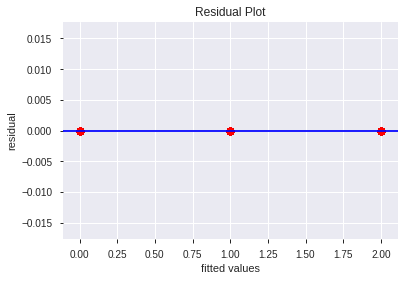

In [43]:
residuals = t_pred - t_test

# Plotting the prediction errors

plt.scatter(t_pred, residuals, color='red')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='blue')
plt.show()

# Polynomial Regression

Model 1: Predict how many goals the home team scores.

In [44]:
# getting the statistical description of our dataset
fifa_df.describe()

,home_score,away_score,neutral,year,month,rank_x,rank_y,result,outcome,tournament_type
count,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000,16904.000000
mean,1.603999,1.068268,0.235684,2006.490771,6.877307,76.056377,78.918836,0.535731,1.243907,1.599976
std,1.615409,1.245122,0.424438,6.803461,3.273882,50.833721,52.027710,2.194856,0.814999,0.509220
min,0.000000,0.000000,0.000000,1993.000000,1.000000,1.000000,1.000000,-15.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2001.000000,4.000000,33.000000,35.000000,-1.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,2007.000000,7.000000,70.000000,72.000000,0.000000,1.000000,2.000000
75%,2.000000,2.000000,0.000000,2012.000000,10.000000,112.000000,115.000000,2.000000,2.000000,2.000000
max,31.000000,15.000000,1.000000,2018.000000,12.000000,209.000000,209.000000,31.000000,2.000000,2.000000


In [0]:
# splitting our dataset into training and testing

x = fifa_df[['rank_x','rank_y','tournament_type']]

y = fifa_df['home_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.3)

In [0]:
# Normalizing our data before running it through the model
#
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [0]:
#  Fitting the polynomial linear regression

poly_features = PolynomialFeatures(include_bias = False, degree = 1)

x_train = poly_features.fit_transform(x_train)
x_test = poly_features.fit_transform(x_test)


In [48]:
#  Training the model

polyreg = LinearRegression()
polyreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Making predictions
#
y_pred_home = polyreg.predict(x_test)

In [50]:
# printing y intercept
print(polyreg.intercept_)

# printing coefficients
print(polyreg.coef_)

1.5981237322515214
[-0.59657733  0.77553644  0.07288946]


This means that for a unit change in the homescore there is a slightly significant change in the homerank, awayrank and tournament type. 

The Y intercept is 1.598

In [51]:
# making predictions
y_pred_home = polyreg.predict(x_test)
y_pred_home

array([1.6326427 , 2.17401546, 3.59806376, ..., 1.70606176, 2.03062773,
       2.07495106])

In [52]:
# We will use the rmse score to evaluate 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_home))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_home))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_home)))

                                          

Mean Absolute Error: 1.0364058149593336
Mean Squared Error: 2.139312032286539
Root Mean Squared Error: 1.4626387224077377


RSME score is 1.4626

Checking for Heteroscedasticity

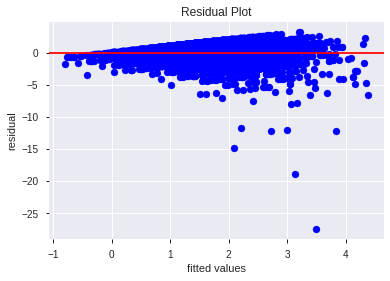

In [53]:
residuals = y_pred_home - y_test

# Plotting the prediction errors

plt.scatter(y_pred_home, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()


Model 2 : Predicting the Away Score

In [0]:
# splitting our dataset into training and testing

x = fifa_df[['rank_x','rank_y','tournament_type']]

y = fifa_df['away_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 25, test_size = 0.3)

In [0]:
# Normalizing our data before running it through the model
#
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [0]:
#  Fitting the polynomial linear regression

poly_features = PolynomialFeatures(include_bias = False, degree = 2)

x_train = poly_features.fit_transform(x_train)
x_test = poly_features.fit_transform(x_test)

In [57]:
#  Training the model

poly_reg = LinearRegression()
poly_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Making predictions
#
y_pred_away = poly_reg.predict(x_test)

In [59]:
# printing y intercept
print(poly_reg.intercept_)

# printing coefficients
print(poly_reg.coef_)

0.8868997107886056
[ 0.43076398 -0.45843562  0.02194315  0.13655647 -0.12120551  0.09700707
  0.08759412 -0.02779151  0.00721144]


In [60]:
# makig predictions
y_pred_away = poly_reg.predict(x_test)
y_pred_away

array([1.15577589, 0.41479886, 1.17772888, ..., 1.85158005, 0.62963119,
       0.3175668 ])

In [61]:
# We will use the rmse score to evaluate 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_away))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_away))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_away)))


Mean Absolute Error: 0.853288300176805
Mean Squared Error: 1.2650563558005221
Root Mean Squared Error: 1.124747240850371


The model has an RMSE score of 1.1247 . lower values of rmse p

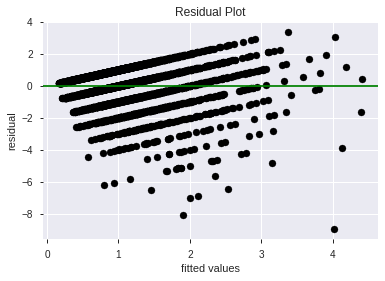

In [62]:
# checking for heteroskedasticity
residuals = y_pred_away - y_test

# Plotting the prediction errors

plt.scatter(y_pred_away, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()


Logistics regression was our best modelling method as its accuracy was 100%